# Bird Species Classification (Colab Setup)

In [1]:
# STEP 1: Upload kaggle.json to access the dataset
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"erickjm404","key":"a51e5a024b596ca8fed6bda4862febdd"}'}

In [2]:
# STEP 2: Setup Kaggle

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset
!kaggle datasets download -d veeralakrishna/200-bird-species-with-11788-images
!unzip -q 200-bird-species-with-11788-images.zip -d data/



Dataset URL: https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images
License(s): CC0-1.0
200-bird-species-with-11788-images.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data/CUB_200_2011.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace data/CUB_200_2011.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace data/CUB_200_2011.tgz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
!rm -rf data/train_data
!rm -rf data/test_data


In [4]:
!unzip -oq 200-bird-species-with-11788-images.zip -d data/


In [15]:
!ls -lh


total 1.2G
-rw-r--r-- 1 root root 1.2G Jan 10  2020 200-bird-species-with-11788-images.zip
drwxr-xr-x 3 root root 4.0K May  7 06:02 data
-rw-r--r-- 1 root root   66 May  7 05:58 kaggle.json
drwxr-xr-x 1 root root 4.0K May  5 13:40 sample_data


In [10]:
!unzip -oq "200-bird-species-with-11788-images.zip" -d data/


In [3]:
!unzip -l 200-bird-species-with-11788-images.zip | head -n 20


Archive:  200-bird-species-with-11788-images.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
1150585339  2020-01-10 13:59   CUB_200_2011.tgz
 39272883  2020-01-10 14:01   segmentations.tgz
---------                     -------
1189858222                     2 files


In [4]:
!mkdir -p data/CUB_200_2011
!tar -xzf CUB_200_2011.tgz -C data/CUB_200_2011


tar (child): CUB_200_2011.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [5]:
!tar -xzf data/CUB_200_2011.tgz -C data/


In [13]:
import os

for root, dirs, files in os.walk("data/CUB_200_2011"):
    print("📁", root)
    for d in dirs[:5]:
        print("   └─", d)
    if dirs:
        break




📁 data/CUB_200_2011
   └─ images


In [6]:
# STEP 4: Install necessary packages
!pip install torch torchvision matplotlib scikit-learn

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet18_Weights, AlexNet_Weights
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

# Load full dataset
full_dataset = datasets.ImageFolder("data/CUB_200_2011/images", transform=transform)

# Split into train/test sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get number of classes
num_classes = len(full_dataset.classes)

# Info
print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))
print("Number of classes:", num_classes)
print("First 5 class names:", full_dataset.classes[:5])





Train size: 9430
Test size: 2358
Number of classes: 200
First 5 class names: ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet']


In [13]:
def train_and_evaluate_model(model_name, num_classes, train_loader, test_loader, num_epochs=15):
    from torchvision.models import (
        resnet18, ResNet18_Weights,
        alexnet, AlexNet_Weights,
        mobilenet_v2, MobileNet_V2_Weights,
        efficientnet_b0, EfficientNet_B0_Weights
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Select model
    if model_name == 'resnet18':
        weights = ResNet18_Weights.DEFAULT
        model = resnet18(weights=weights)
        for param in model.parameters():
            param.requires_grad = False
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        for param in model.fc.parameters():
            param.requires_grad = True

    elif model_name == 'alexnet':
        weights = AlexNet_Weights.DEFAULT
        model = alexnet(weights=weights)
        for param in model.parameters():
            param.requires_grad = False
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
        for param in model.classifier[6].parameters():
            param.requires_grad = True

    elif model_name == 'mobilenet_v2':
        weights = MobileNet_V2_Weights.DEFAULT
        model = mobilenet_v2(weights=weights)
        for param in model.parameters():
            param.requires_grad = False
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        for param in model.classifier[1].parameters():
            param.requires_grad = True

    elif model_name == 'efficientnet_b0':
        weights = EfficientNet_B0_Weights.DEFAULT
        model = efficientnet_b0(weights=weights)
        for param in model.parameters():
            param.requires_grad = False
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        for param in model.classifier[1].parameters():
            param.requires_grad = True

    else:
        raise ValueError("Unsupported model")

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

    train_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_train_loss)

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy = 100 * correct / total
        test_accuracy_history.append(accuracy)

        print(f"[{model_name}] Epoch {epoch+1}/{num_epochs} - Loss: {avg_train_loss:.4f} - Accuracy: {accuracy:.2f}%")

    return model, train_loss_history, test_accuracy_history



In [14]:
resnet_model, resnet_loss, resnet_acc = train_and_evaluate_model('resnet18', num_classes, train_loader, test_loader)
alexnet_model, alexnet_loss, alexnet_acc = train_and_evaluate_model('alexnet', num_classes, train_loader, test_loader)
mobilenet_model, mobilenet_loss, mobilenet_acc = train_and_evaluate_model('mobilenet_v2', num_classes, train_loader, test_loader)
efficientnet_model, efficientnet_loss, efficientnet_acc = train_and_evaluate_model('efficientnet_b0', num_classes, train_loader, test_loader)



[resnet18] Epoch 1/15 - Loss: 4.1959 - Accuracy: 23.88%
[resnet18] Epoch 2/15 - Loss: 2.7684 - Accuracy: 28.88%
[resnet18] Epoch 3/15 - Loss: 2.3204 - Accuracy: 30.32%
[resnet18] Epoch 4/15 - Loss: 2.0568 - Accuracy: 32.40%
[resnet18] Epoch 5/15 - Loss: 1.8632 - Accuracy: 32.57%
[resnet18] Epoch 6/15 - Loss: 1.7327 - Accuracy: 32.99%
[resnet18] Epoch 7/15 - Loss: 1.6086 - Accuracy: 33.16%
[resnet18] Epoch 8/15 - Loss: 1.5044 - Accuracy: 32.99%
[resnet18] Epoch 9/15 - Loss: 1.4282 - Accuracy: 34.31%
[resnet18] Epoch 10/15 - Loss: 1.3614 - Accuracy: 32.99%
[resnet18] Epoch 11/15 - Loss: 1.3103 - Accuracy: 33.12%
[resnet18] Epoch 12/15 - Loss: 1.2511 - Accuracy: 33.42%
[resnet18] Epoch 13/15 - Loss: 1.2060 - Accuracy: 33.38%
[resnet18] Epoch 14/15 - Loss: 1.1719 - Accuracy: 32.99%
[resnet18] Epoch 15/15 - Loss: 1.1417 - Accuracy: 33.67%
[alexnet] Epoch 1/15 - Loss: 5.1425 - Accuracy: 15.14%
[alexnet] Epoch 2/15 - Loss: 3.2064 - Accuracy: 16.96%
[alexnet] Epoch 3/15 - Loss: 2.5776 - Accura

In [11]:
!nvidia-smi


Wed May  7 22:37:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P0             29W /   70W |     680MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
torch.save(resnet_model.state_dict(), "resnet18_bird_classifier.pth")
torch.save(alexnet_model.state_dict(), "alexnet_bird_classifier.pth")
torch.save(mobilenet_model.state_dict(), "mobilenetv2_bird_classifier.pth")
torch.save(efficientnet_model.state_dict(), "efficientnet_b0_bird_classifier.pth")



In [17]:
from torchvision.models import (
    resnet18, ResNet18_Weights,
    alexnet, AlexNet_Weights,
    mobilenet_v2, MobileNet_V2_Weights,
    efficientnet_b0, EfficientNet_B0_Weights
)

# ResNet18
resnet_model = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)
resnet_model.load_state_dict(torch.load("resnet18_bird_classifier.pth"))
resnet_model = resnet_model.to(device)
resnet_model.eval()

# AlexNet
alexnet_model = alexnet(weights=AlexNet_Weights.DEFAULT)
alexnet_model.classifier[6] = nn.Linear(alexnet_model.classifier[6].in_features, num_classes)
alexnet_model.load_state_dict(torch.load("alexnet_bird_classifier.pth"))
alexnet_model = alexnet_model.to(device)
alexnet_model.eval()

# MobileNetV2
mobilenet_model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)
mobilenet_model.classifier[1] = nn.Linear(mobilenet_model.classifier[1].in_features, num_classes)
mobilenet_model.load_state_dict(torch.load("mobilenetv2_bird_classifier.pth"))
mobilenet_model = mobilenet_model.to(device)
mobilenet_model.eval()

# EfficientNet-B0
efficientnet_model = efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
efficientnet_model.classifier[1] = nn.Linear(efficientnet_model.classifier[1].in_features, num_classes)
efficientnet_model.load_state_dict(torch.load("efficientnet_b0_bird_classifier.pth"))
efficientnet_model = efficientnet_model.to(device)
efficientnet_model.eval()


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 140MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'resnet18_bird_classifier.pth'

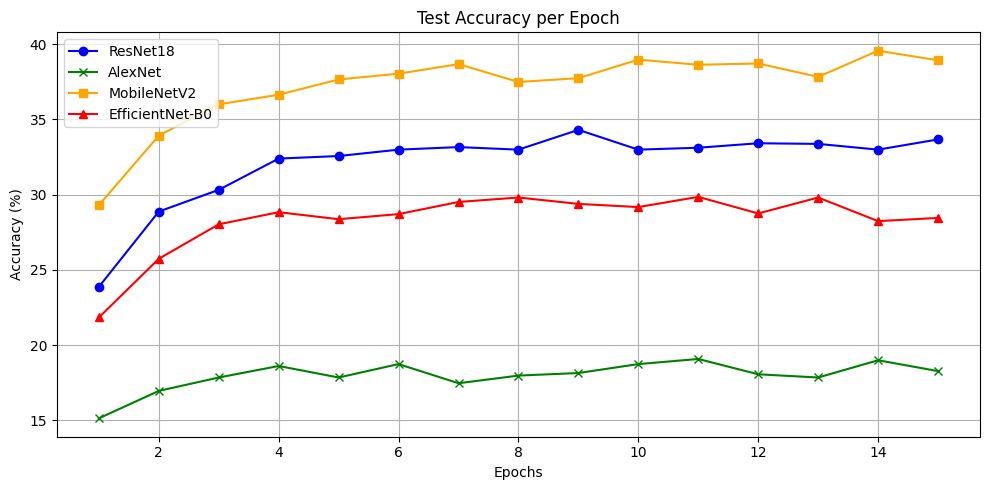

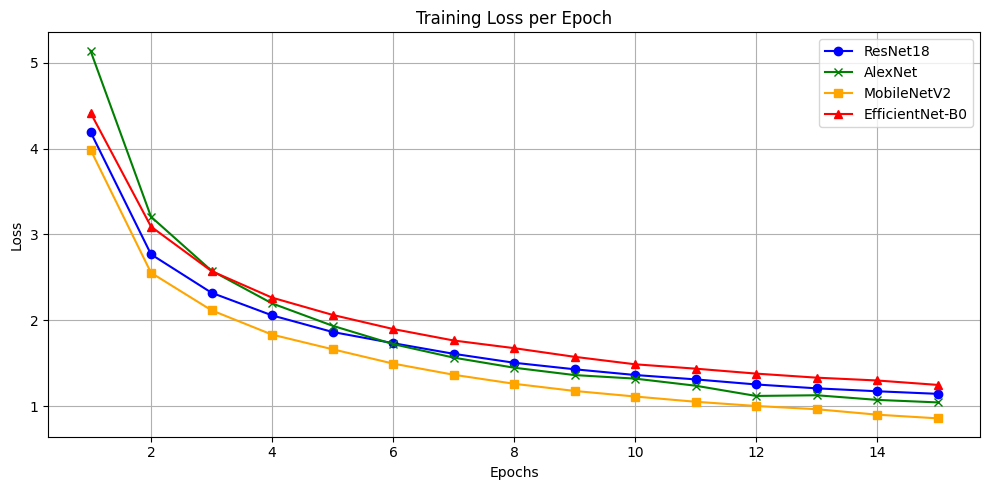

In [16]:
epochs = range(1, len(resnet_loss) + 1)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, resnet_acc, label='ResNet18', color='blue', marker='o')
plt.plot(epochs, alexnet_acc, label='AlexNet', color='green', marker='x')
plt.plot(epochs, mobilenet_acc, label='MobileNetV2', color='orange', marker='s')
plt.plot(epochs, efficientnet_acc, label='EfficientNet-B0', color='red', marker='^')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, resnet_loss, label='ResNet18', color='blue', marker='o')
plt.plot(epochs, alexnet_loss, label='AlexNet', color='green', marker='x')
plt.plot(epochs, mobilenet_loss, label='MobileNetV2', color='orange', marker='s')
plt.plot(epochs, efficientnet_loss, label='EfficientNet-B0', color='red', marker='^')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, dataloader, classes, max_classes_to_show=None, save_path=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    # Limit number of classes shown (for readability)
    if max_classes_to_show:
        cm = cm[:max_classes_to_show, :max_classes_to_show]
        class_labels = classes[:max_classes_to_show]
    else:
        class_labels = classes

    fig, ax = plt.subplots(figsize=(12, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax, xticks_rotation=90, cmap='Blues', colorbar=True)

    plt.title(f"Confusion Matrix ({model.__class__.__name__})")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()



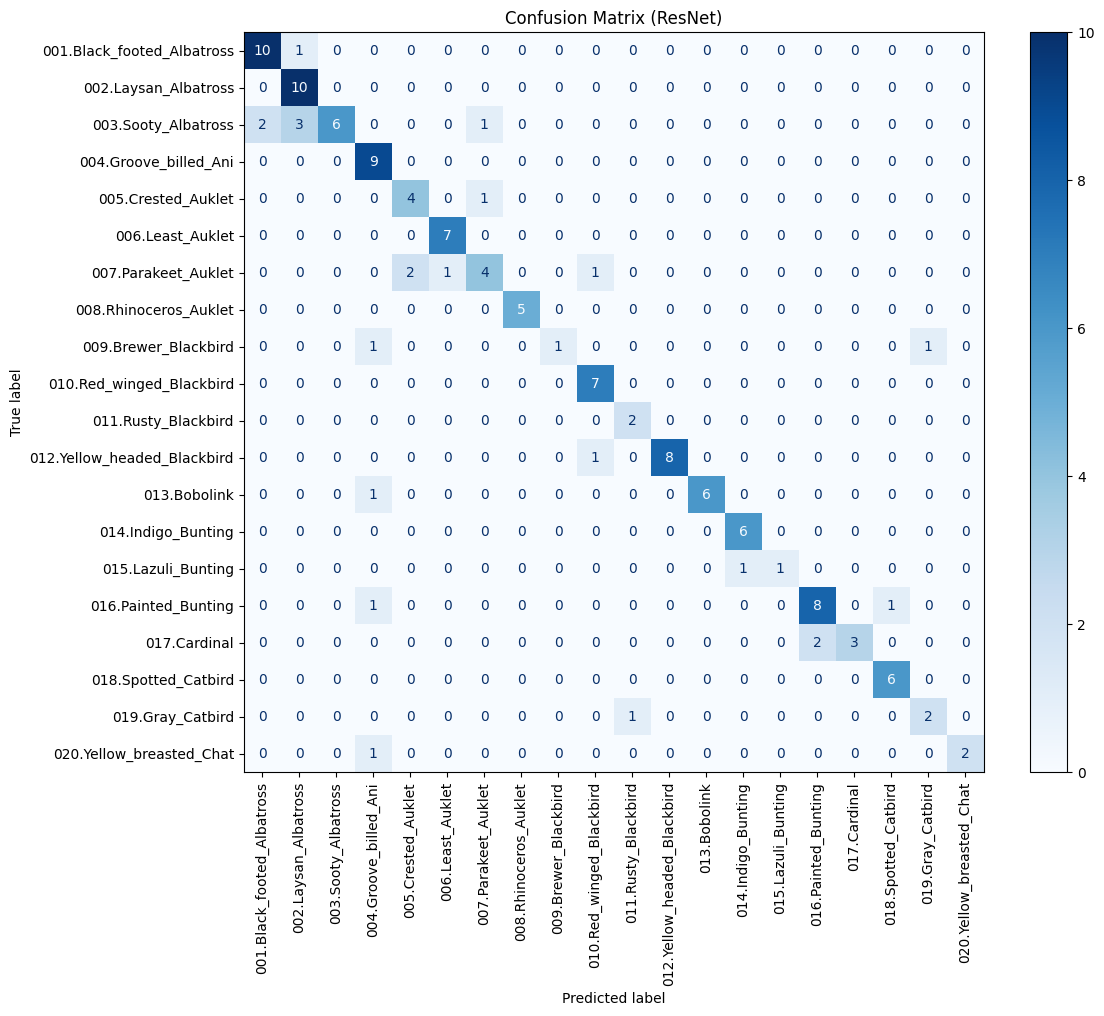

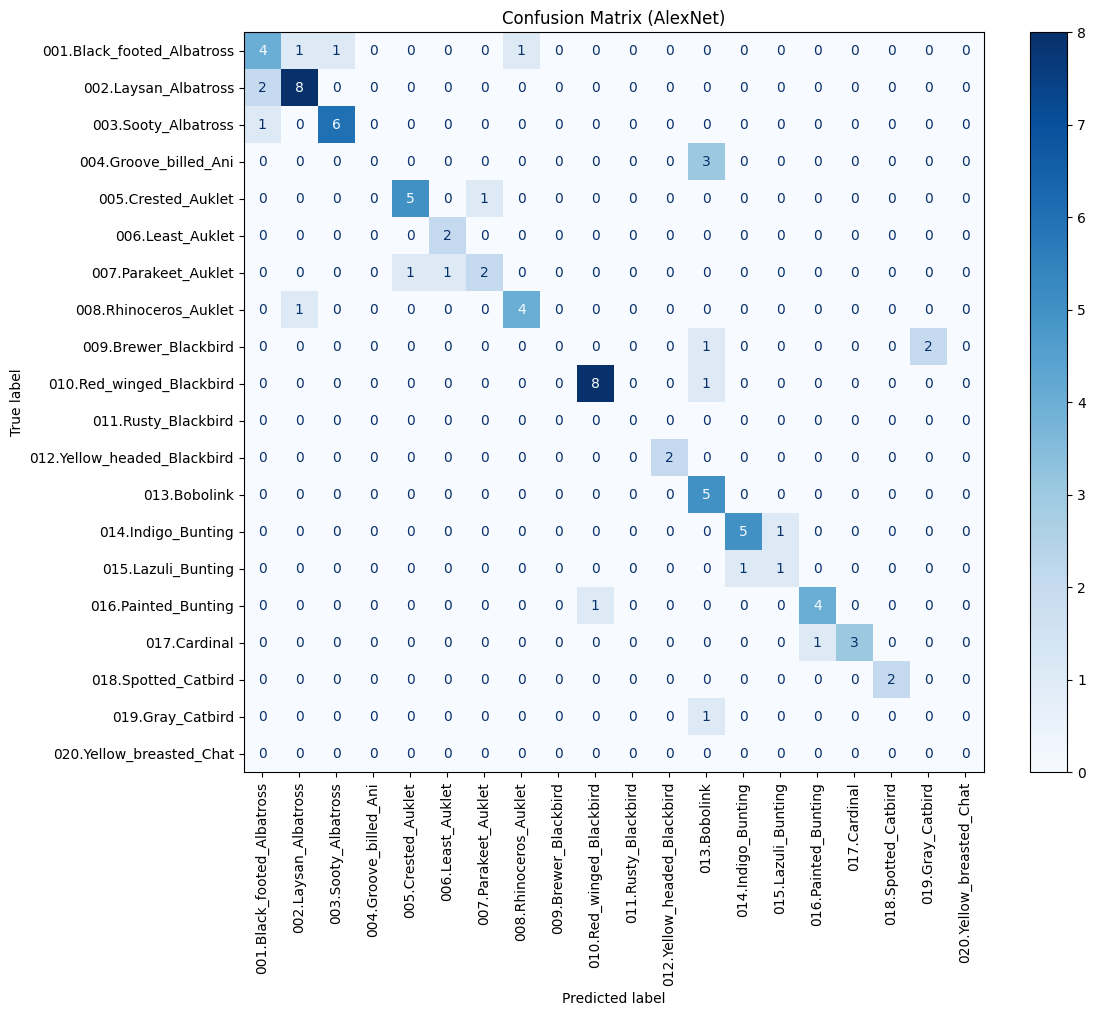

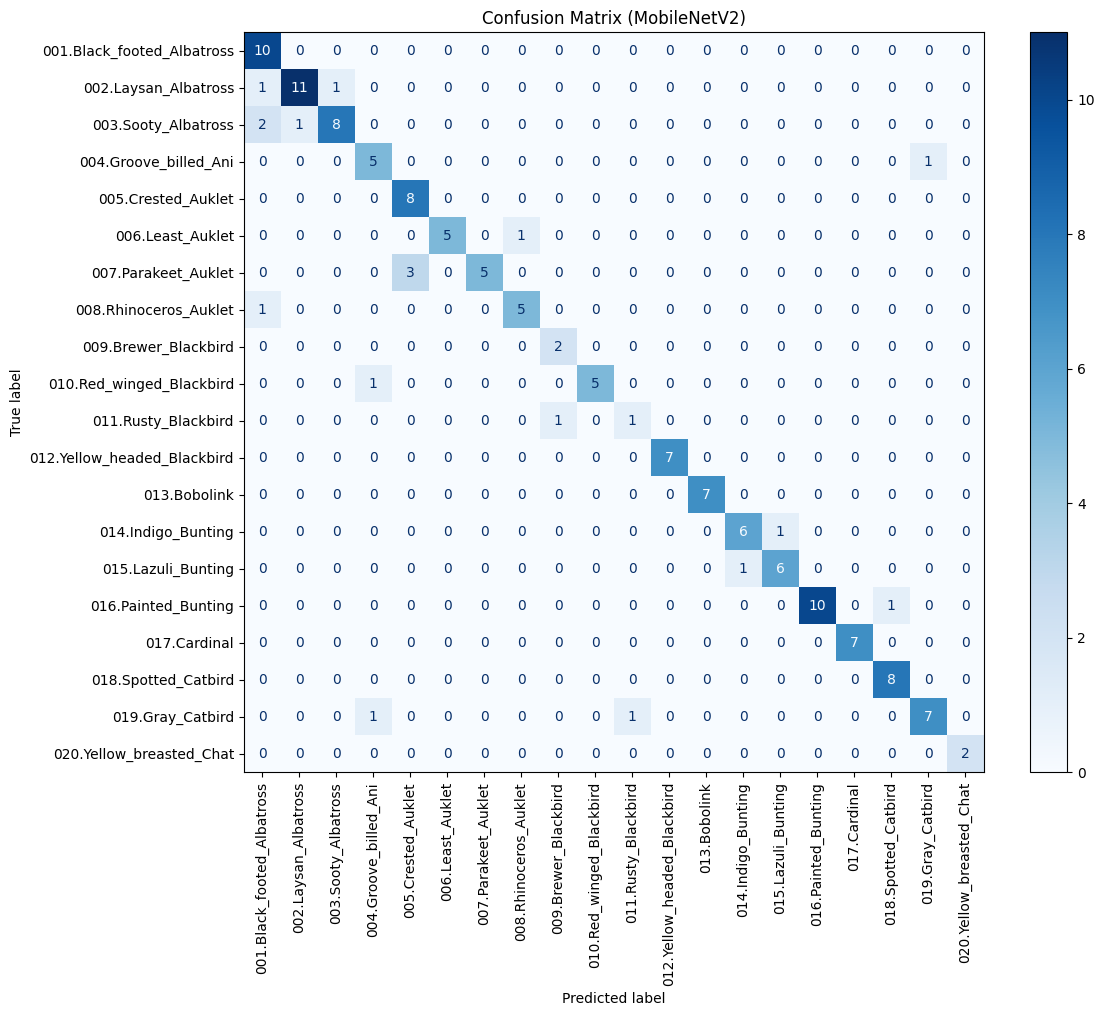

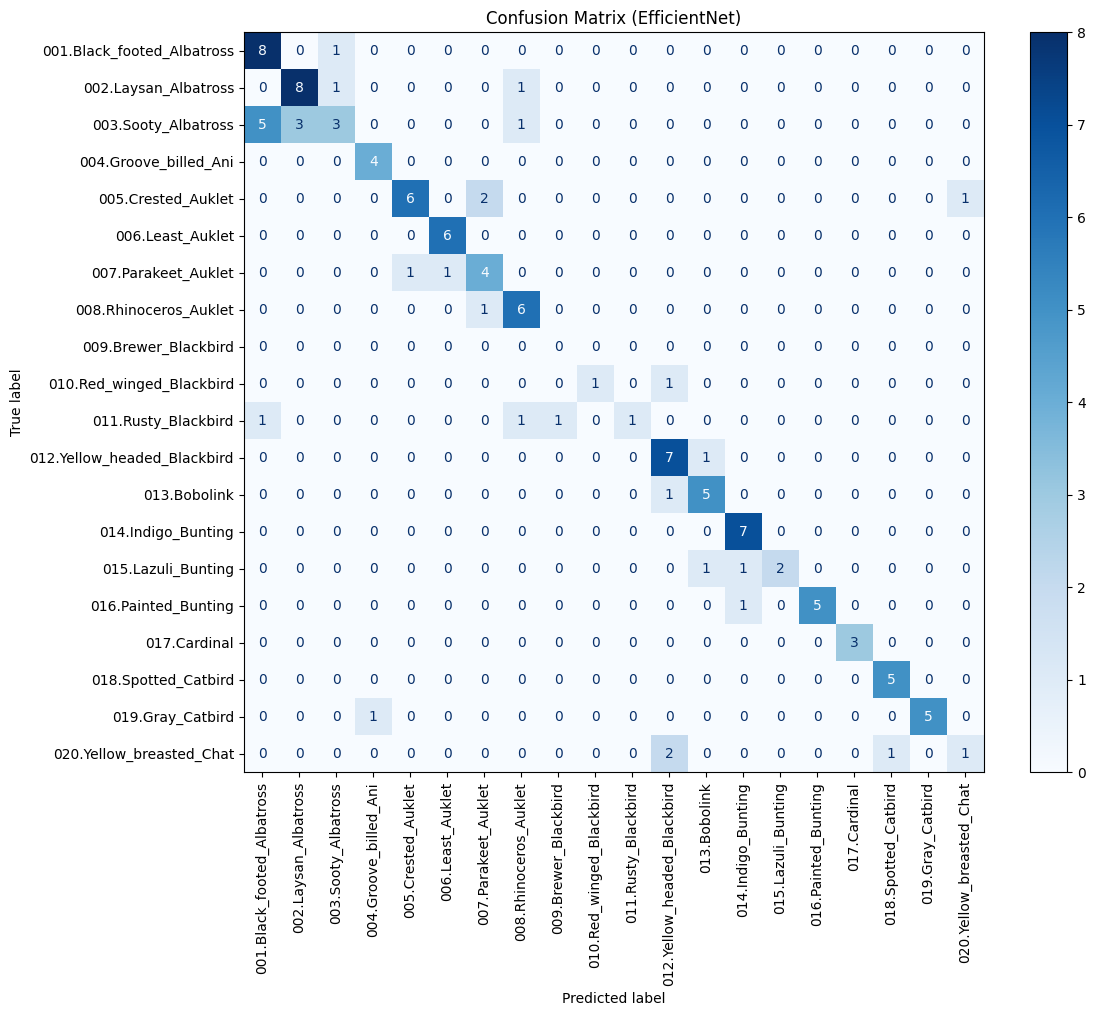

In [18]:
plot_confusion_matrix(resnet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)
plot_confusion_matrix(alexnet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)
plot_confusion_matrix(mobilenet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)
plot_confusion_matrix(efficientnet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)






In [19]:
from sklearn.metrics import classification_report


In [20]:
from sklearn.metrics import classification_report
import torch
import numpy as np

def print_classification_report(model, dataloader, classes, max_classes_to_show=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    if max_classes_to_show and max_classes_to_show < len(classes):
        # Filter to only include predictions/labels from the first N classes
        mask = all_labels < max_classes_to_show
        filtered_labels = all_labels[mask]
        filtered_preds = all_preds[mask]

        # Filter out-of-range predictions
        filtered_preds = np.clip(filtered_preds, 0, max_classes_to_show - 1)

        target_names = classes[:max_classes_to_show]
        report = classification_report(
            filtered_labels, filtered_preds, labels=range(max_classes_to_show),
            target_names=target_names, zero_division=0
        )
    else:
        report = classification_report(all_labels, all_preds, target_names=classes, zero_division=0)

    print(report)



In [21]:
# Print classification report for all 4 models (first 20 classes only)
print_classification_report(resnet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)
print_classification_report(alexnet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)
print_classification_report(mobilenet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)
print_classification_report(efficientnet_model, test_loader, train_dataset.dataset.classes, max_classes_to_show=20)




                             precision    recall  f1-score   support

 001.Black_footed_Albatross       0.91      0.71      0.80        14
       002.Laysan_Albatross       0.65      0.52      0.58        21
        003.Sooty_Albatross       0.86      0.33      0.48        18
      004.Groove_billed_Ani       0.73      0.67      0.70        12
         005.Crested_Auklet       0.60      0.33      0.43         9
           006.Least_Auklet       0.78      0.88      0.82         8
        007.Parakeet_Auklet       0.67      0.40      0.50        10
      008.Rhinoceros_Auklet       1.00      0.70      0.82        10
       009.Brewer_Blackbird       0.50      0.11      0.18         9
   010.Red_winged_Blackbird       0.78      0.70      0.74        10
        011.Rusty_Blackbird       1.00      0.15      0.27        13
012.Yellow_headed_Blackbird       1.00      0.67      0.80         9
               013.Bobolink       0.83      0.42      0.56        12
         014.Indigo_Bunting      


🧠 Testing ResNet18 on 5 random images


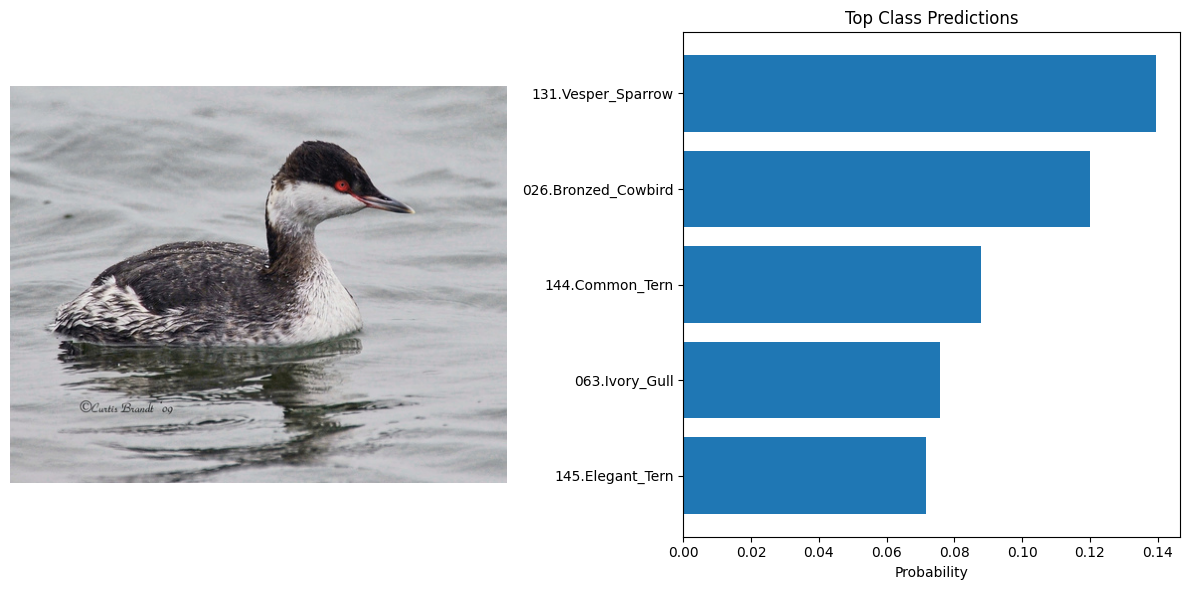

Image 1:
  Actual class: 051.Horned_Grebe
  Predicted class: 131.Vesper_Sparrow
------------------------------


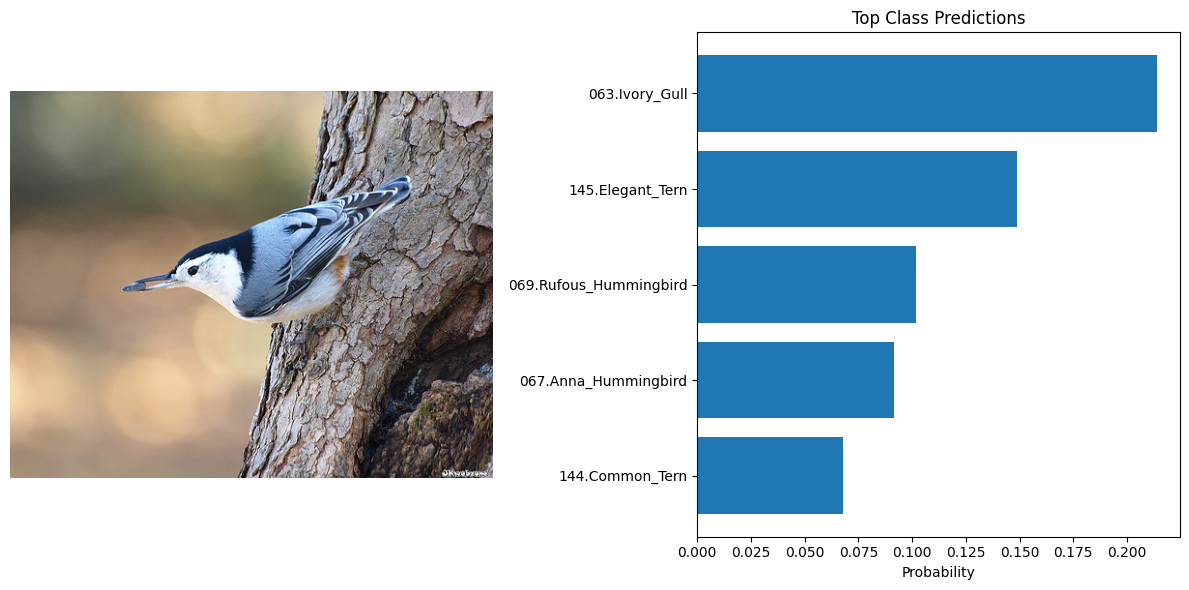

Image 2:
  Actual class: 094.White_breasted_Nuthatch
  Predicted class: 063.Ivory_Gull
------------------------------


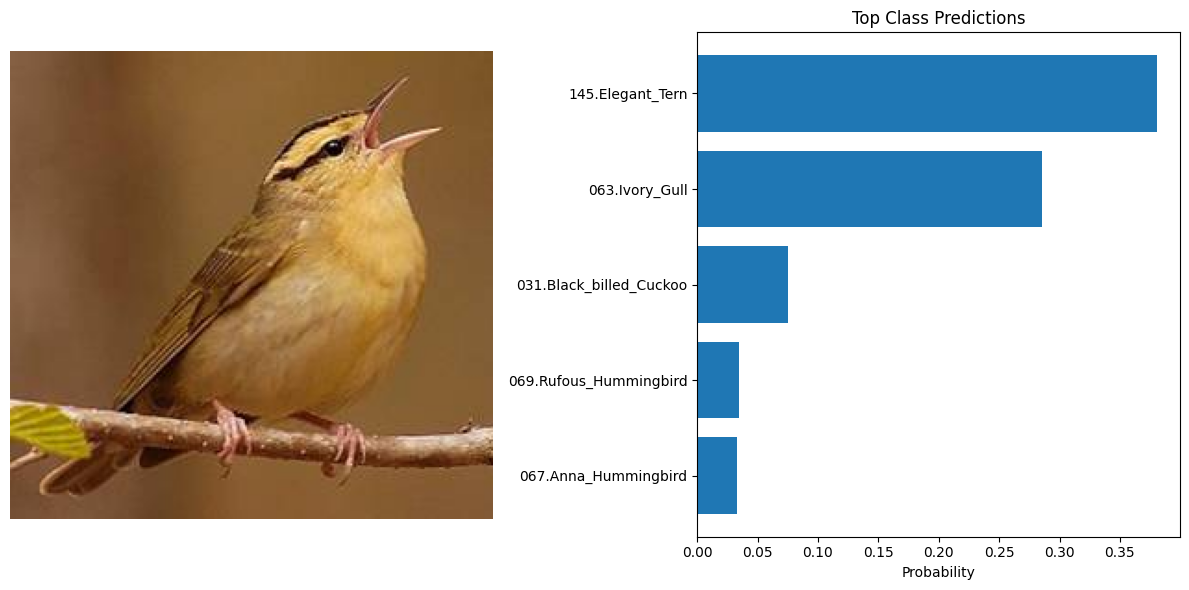

Image 3:
  Actual class: 181.Worm_eating_Warbler
  Predicted class: 145.Elegant_Tern
------------------------------


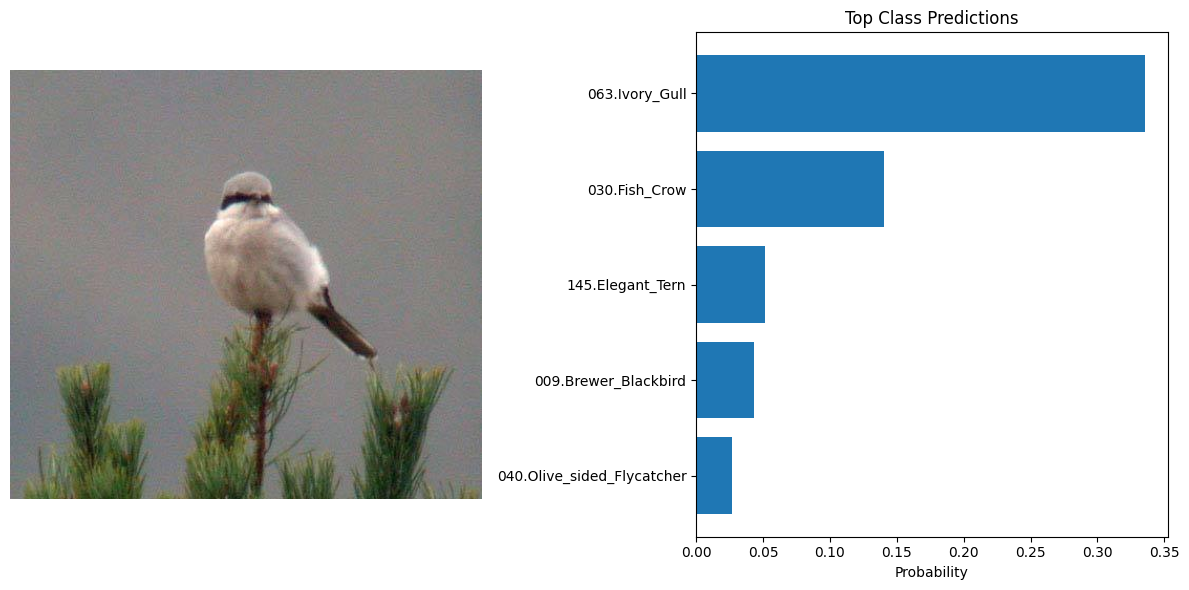

Image 4:
  Actual class: 112.Great_Grey_Shrike
  Predicted class: 063.Ivory_Gull
------------------------------


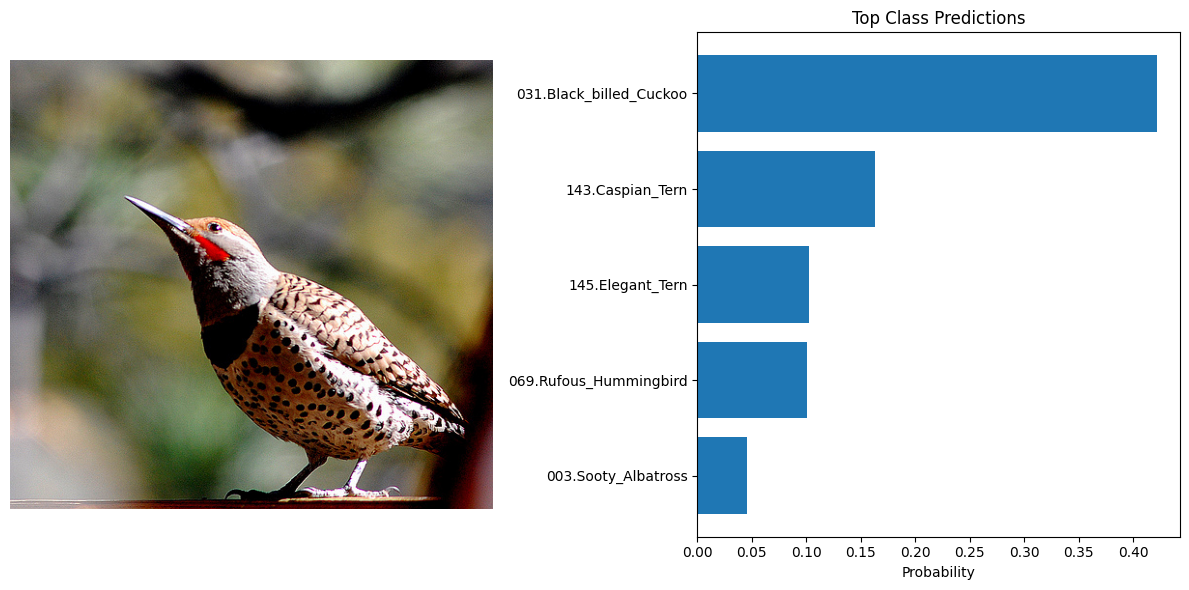

Image 5:
  Actual class: 036.Northern_Flicker
  Predicted class: 031.Black_billed_Cuckoo
------------------------------

🧠 Testing AlexNet on 5 random images


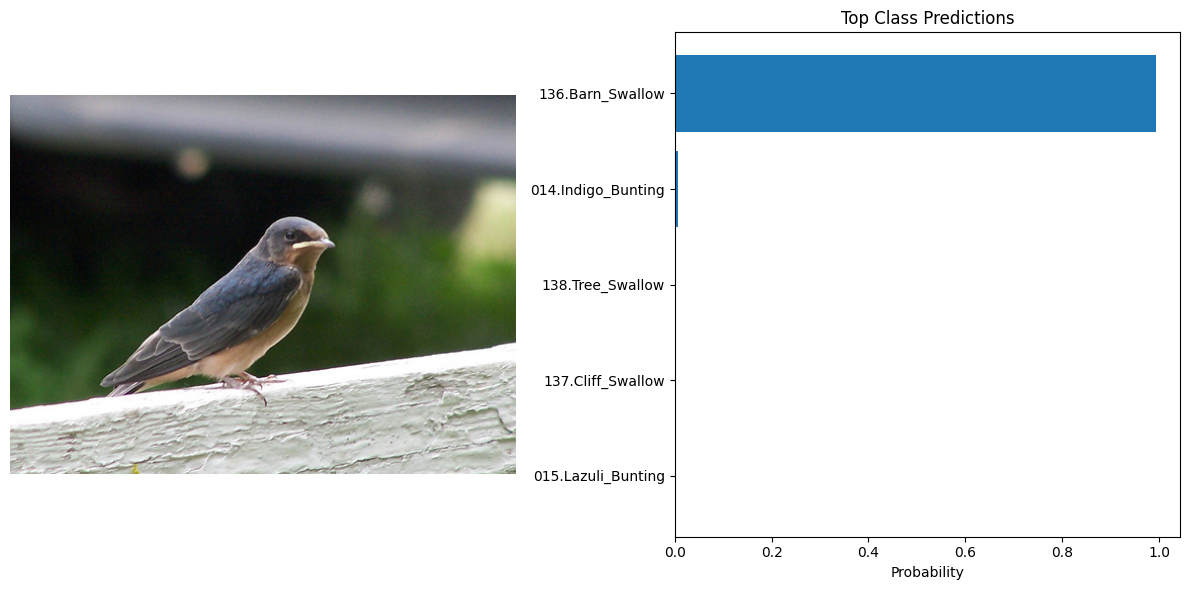

Image 1:
  Actual class: 137.Cliff_Swallow
  Predicted class: 136.Barn_Swallow
------------------------------


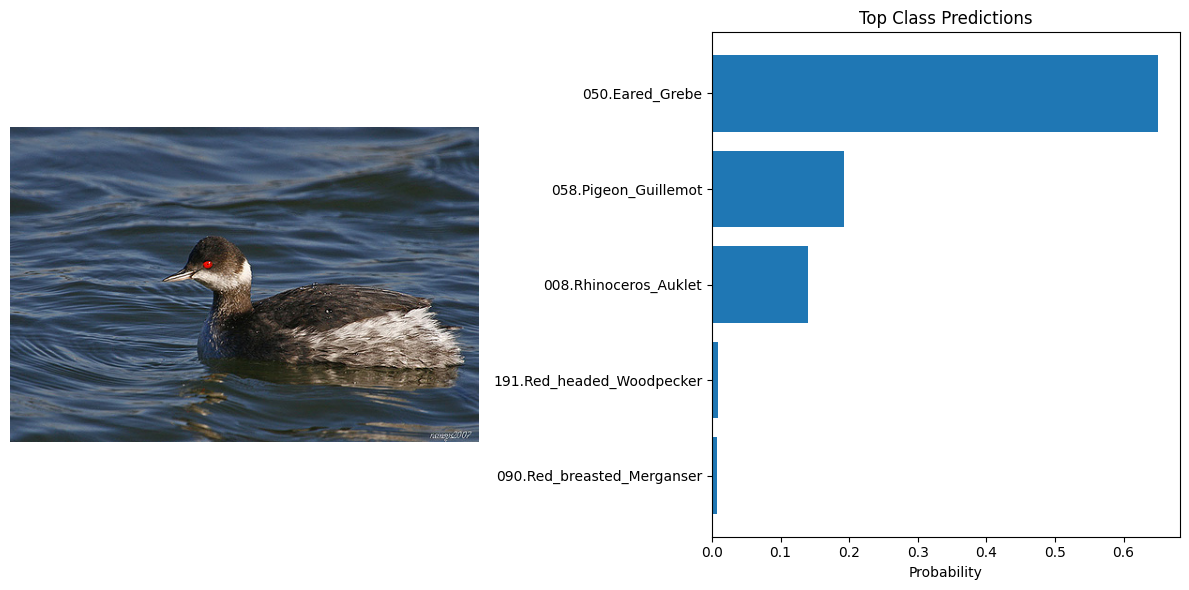

Image 2:
  Actual class: 050.Eared_Grebe
  Predicted class: 050.Eared_Grebe
------------------------------


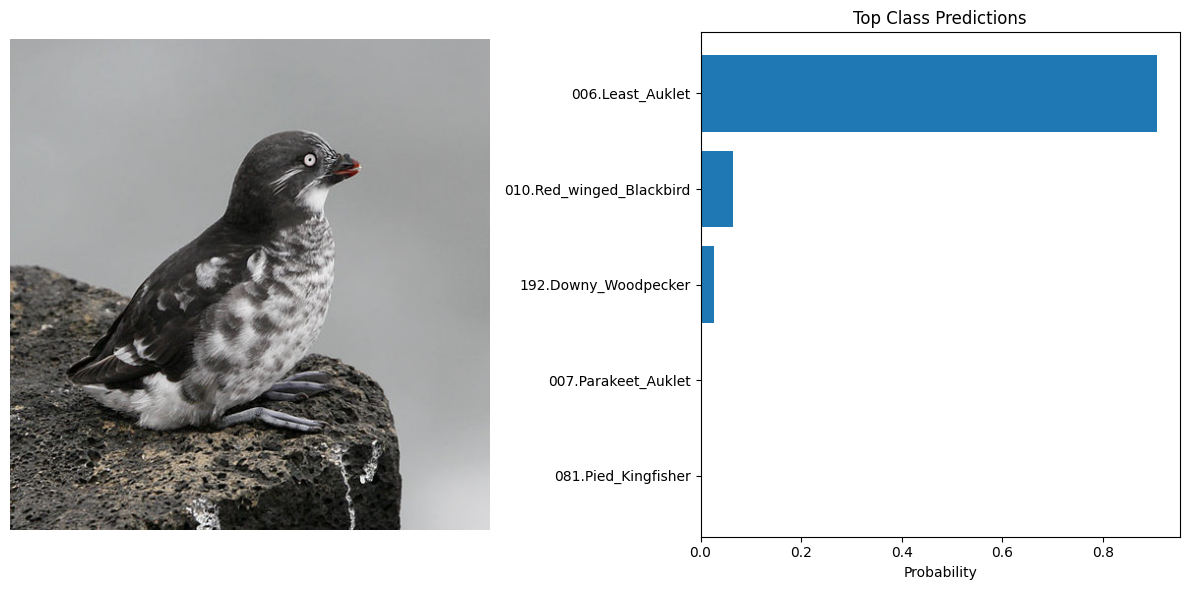

Image 3:
  Actual class: 006.Least_Auklet
  Predicted class: 006.Least_Auklet
------------------------------


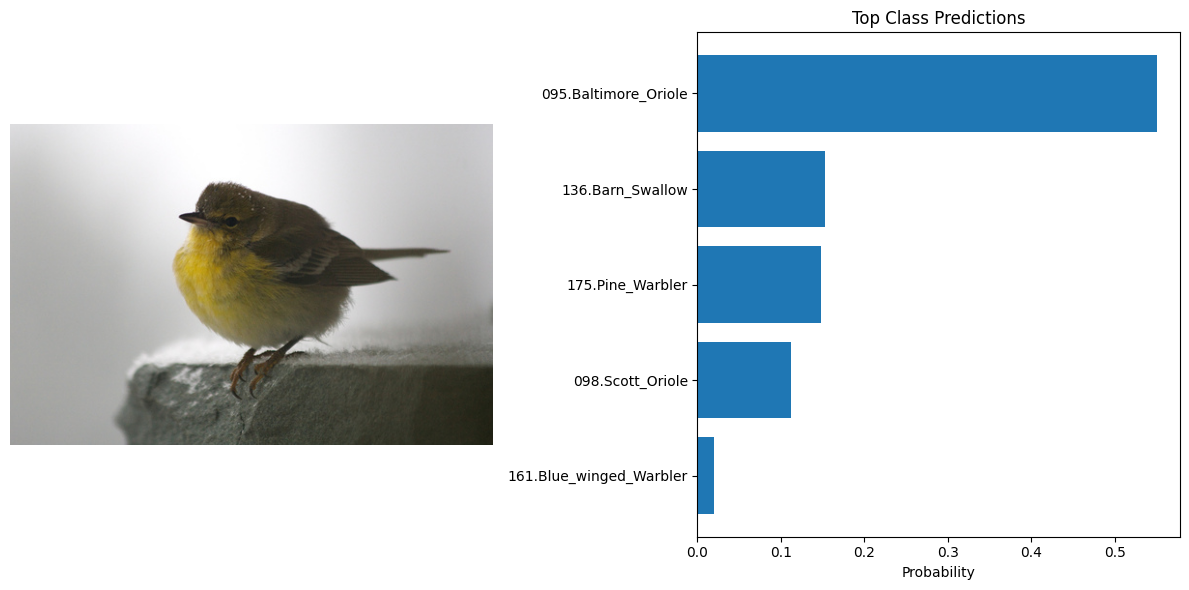

Image 4:
  Actual class: 175.Pine_Warbler
  Predicted class: 095.Baltimore_Oriole
------------------------------


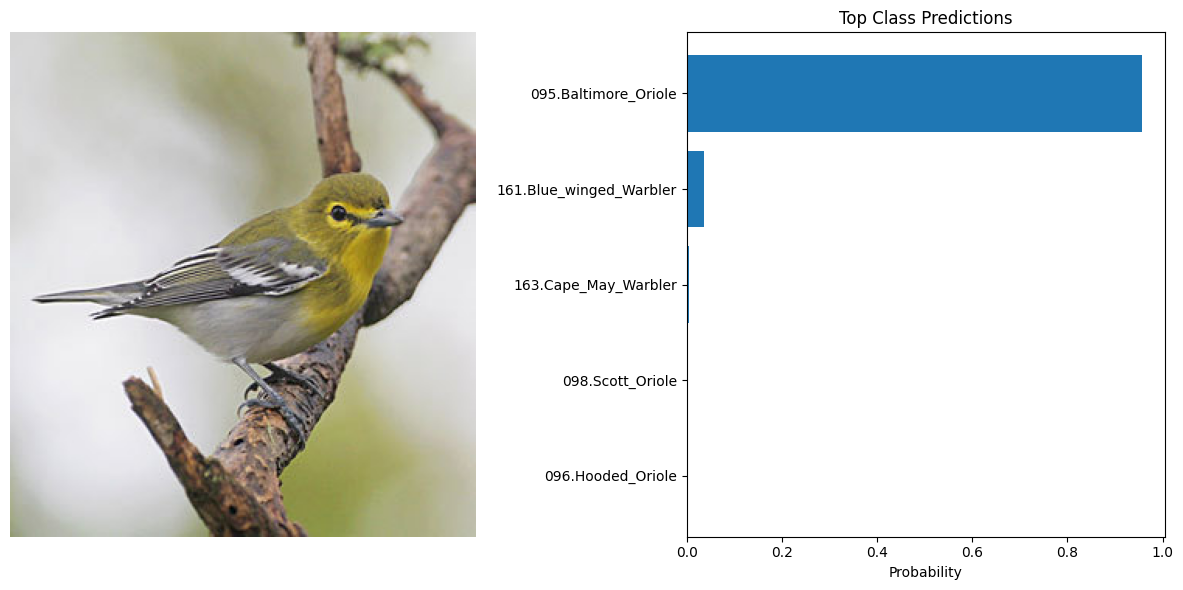

Image 5:
  Actual class: 157.Yellow_throated_Vireo
  Predicted class: 095.Baltimore_Oriole
------------------------------

🧠 Testing MobileNetV2 on 5 random images


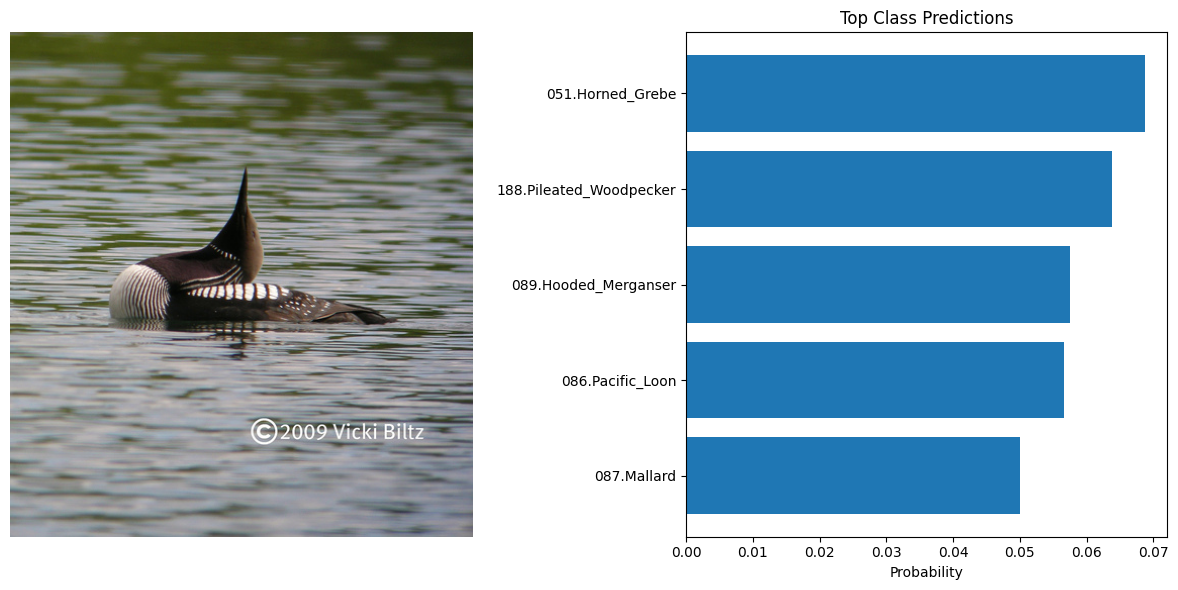

Image 1:
  Actual class: 086.Pacific_Loon
  Predicted class: 051.Horned_Grebe
------------------------------


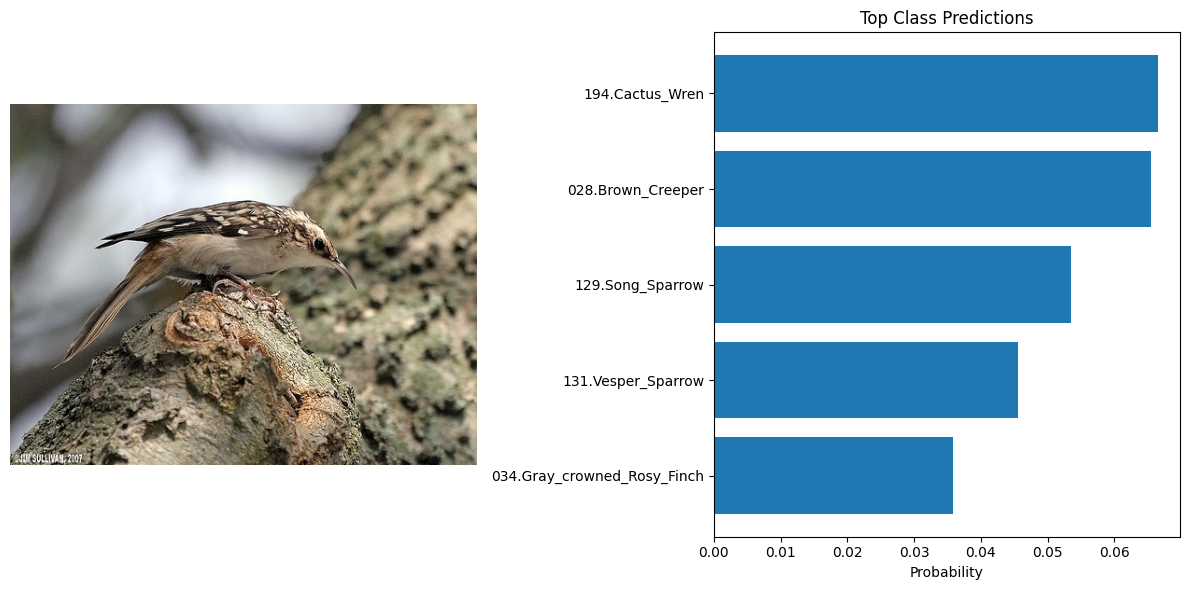

Image 2:
  Actual class: 028.Brown_Creeper
  Predicted class: 194.Cactus_Wren
------------------------------


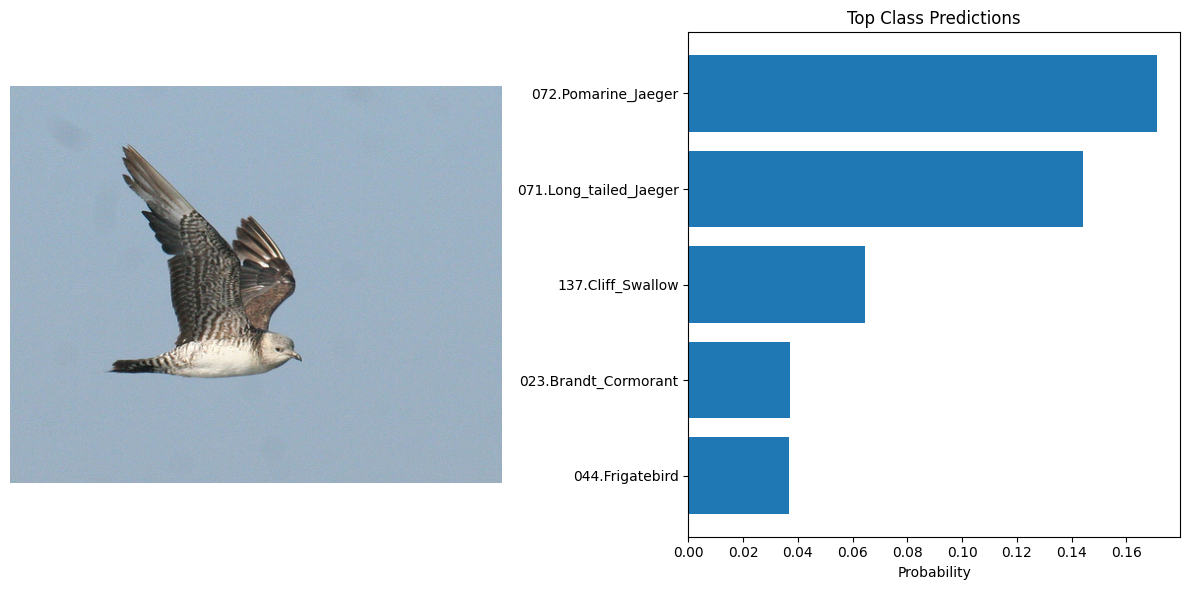

Image 3:
  Actual class: 071.Long_tailed_Jaeger
  Predicted class: 072.Pomarine_Jaeger
------------------------------


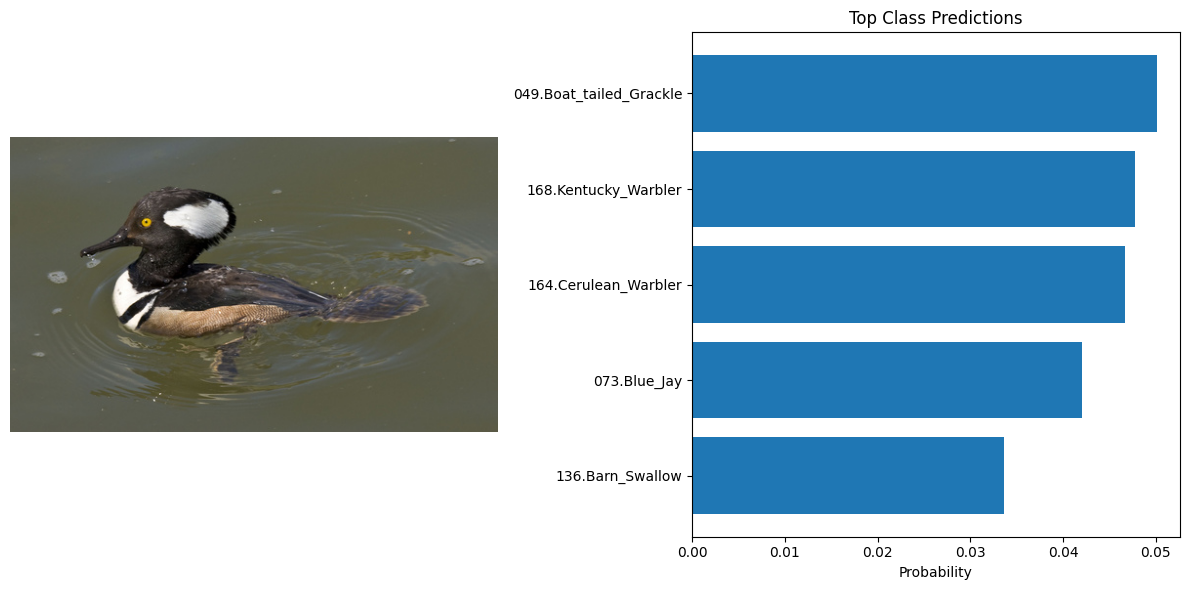

Image 4:
  Actual class: 089.Hooded_Merganser
  Predicted class: 049.Boat_tailed_Grackle
------------------------------


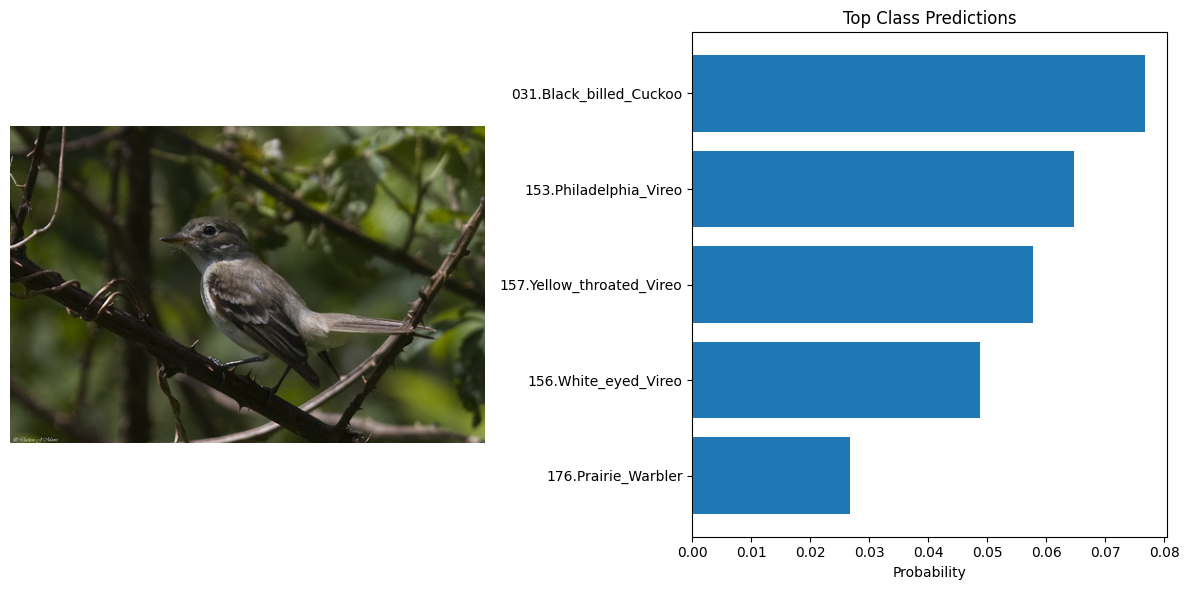

Image 5:
  Actual class: 039.Least_Flycatcher
  Predicted class: 031.Black_billed_Cuckoo
------------------------------

🧠 Testing EfficientNetB0 on 5 random images


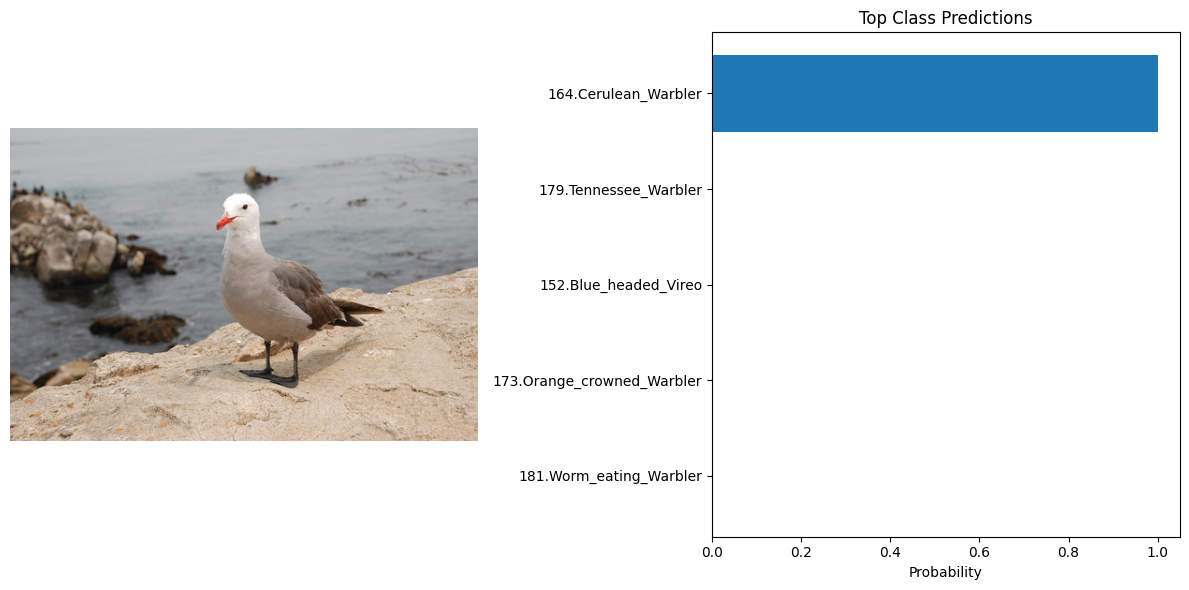

Image 1:
  Actual class: 061.Heermann_Gull
  Predicted class: 164.Cerulean_Warbler
------------------------------


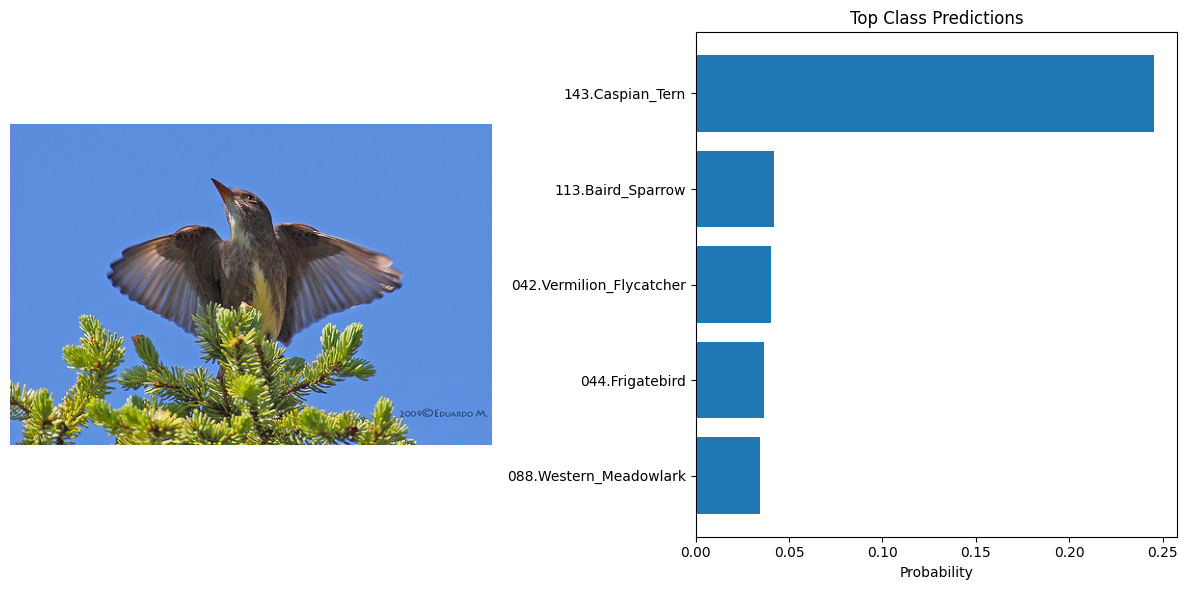

Image 2:
  Actual class: 040.Olive_sided_Flycatcher
  Predicted class: 143.Caspian_Tern
------------------------------


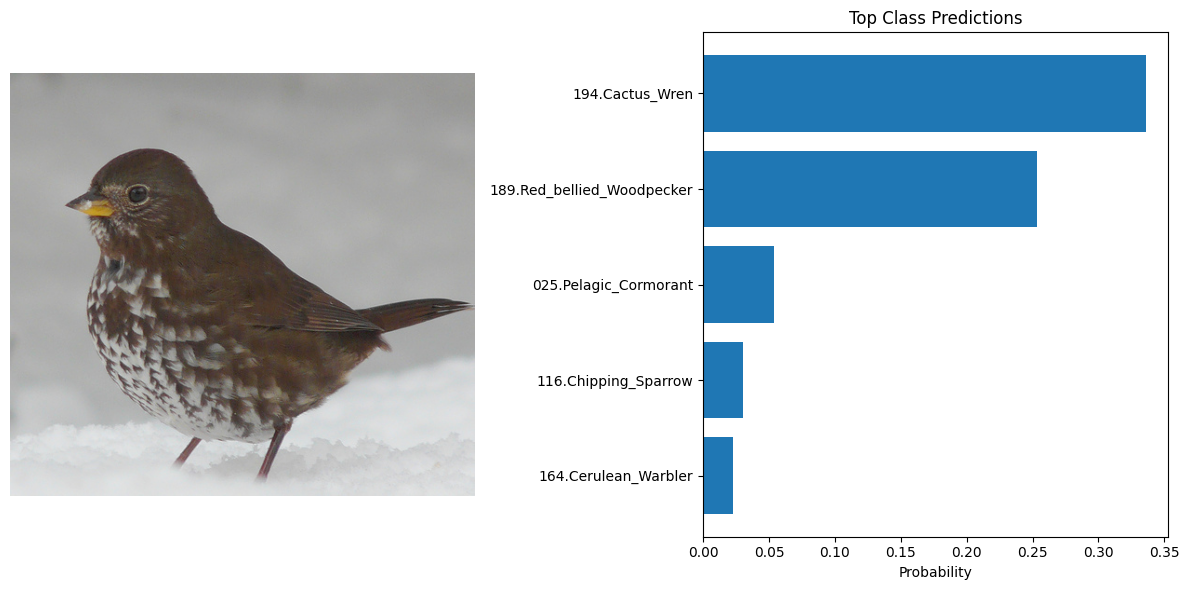

Image 3:
  Actual class: 120.Fox_Sparrow
  Predicted class: 194.Cactus_Wren
------------------------------


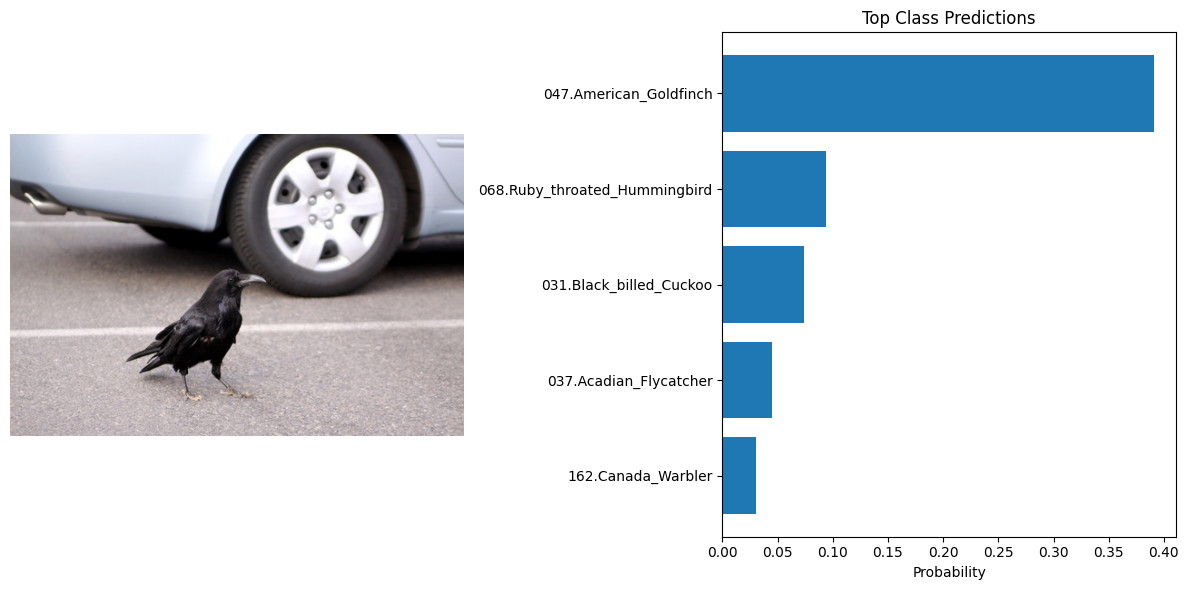

Image 4:
  Actual class: 107.Common_Raven
  Predicted class: 047.American_Goldfinch
------------------------------


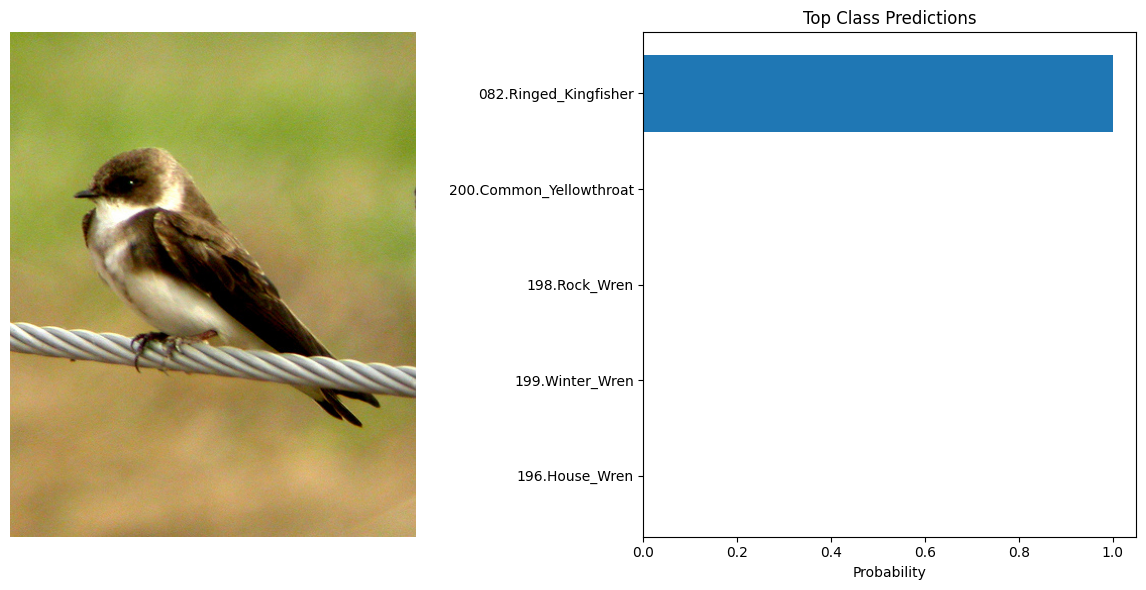

Image 5:
  Actual class: 135.Bank_Swallow
  Predicted class: 082.Ringed_Kingfisher
------------------------------


In [23]:
# List of models and their names
models_to_test = {
    "ResNet18": resnet_model,
    "AlexNet": alexnet_model,
    "MobileNetV2": mobilenet_model,
    "EfficientNetB0": efficientnet_model
}

# Device and classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_names = train_dataset.dataset.classes
test_folder_path = "data/CUB_200_2011/images"

# Loop through each model
for model_name, model in models_to_test.items():
    print(f"\n🧠 Testing {model_name} on 5 random images")
    print("=" * 50)

    for i in range(5):
        test_image_path, actual_class = get_random_image_from_folder(test_folder_path)
        original_image, probabilities = predict_image(model, test_image_path, transform, device)
        visualize_predictions(original_image, probabilities, class_names)

        predicted_class_idx = probabilities.argmax()
        predicted_class = class_names[predicted_class_idx]

        print(f"Image {i+1}:")
        print(f"  Actual class: {actual_class}")
        print(f"  Predicted class: {predicted_class}")
        print("-" * 30)


In [30]:
# Function to compute Top-5 Accuracy
def compute_top5_accuracy(model, dataloader, device):
    model.eval()
    top5_correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, top5_preds = outputs.topk(5, dim=1)  # Get top 5 predictions
            top5_correct += (top5_preds == labels.view(-1, 1)).sum().item()
            total += labels.size(0)
    return 100 * top5_correct / total

# Run Top-5 Accuracy for all models
models_to_test = {
    "ResNet18": resnet_model,
    "AlexNet": alexnet_model,
    "MobileNetV2": mobilenet_model,
    "EfficientNetB0": efficientnet_model
}

print("🎯 Top-5 Accuracy (Test Set):")
print("=" * 35)
for name, model in models_to_test.items():
    top5 = compute_top5_accuracy(model, test_loader, device)
    print(f"{name:<15}: {top5:.2f}%")


🎯 Top-5 Accuracy (Test Set):
ResNet18       : 61.32%
AlexNet        : 42.15%
MobileNetV2    : 66.79%
EfficientNetB0 : 54.28%
